# Investment Club 10/12/2020
### Predicting the price of gold model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Collection and Processing

In [3]:
# loading the csv data
gold_data = pd.read_csv("gld_price_data.csv")

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

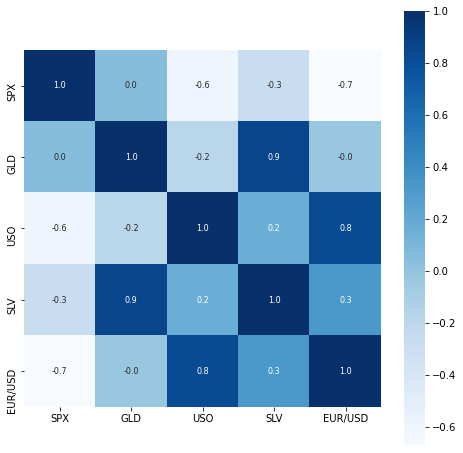

In [10]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [11]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


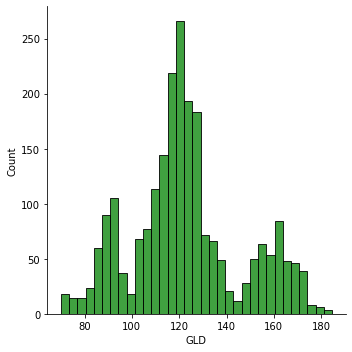

In [12]:
sns.displot(gold_data['GLD'], color = 'green')

In [13]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
#Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [17]:
regressor = RandomForestRegressor(n_estimators = 100)

In [18]:
#Training model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [19]:
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.71079973  81.93750005 116.04540051 127.7025005  120.70980143
 154.58529798 150.16879823 126.12800051 117.40269901 126.03280089
 116.73400113 171.8011009  141.57609898 167.82979896 115.04189983
 117.60160036 137.95550261 170.24120066 159.55640338 159.05549889
 155.21920051 125.11950035 176.03979973 157.57060336 125.20820048
  93.69859989  76.92530049 120.8896002  119.17869974 167.43749967
  88.24700049 125.34060041  91.37390108 117.6655005  121.02429914
 136.01830113 115.31370135 114.95850085 147.05319978 106.88930098
 104.55100246  87.05149771 126.50270042 117.91520018 153.07969879
 119.60480012 108.34639971 107.93129818  93.17980026 127.28429714
  74.5715005  113.65699879 121.37790022 111.3604993  118.90729875
 120.58159968 159.50280022 167.5270015  147.10329693  85.83499889
  94.30150037  86.77479903  90.4120999  118.85620059 126.39320069
 127.65099998 170.3746003  122.34929945 117.38299907  98.39560009
 167.6483013  143.48239824 131.97340244 121.16930234 121.01829943
 119.72930

In [21]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9898513056718727


### Comparing actual values and predicted values

In [22]:
Y_test = list(Y_test)

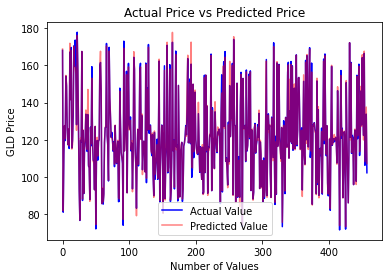

In [24]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'red', label = 'Predicted Value', alpha = 0.5)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()